In [12]:
import numpy as np
from matplotlib import pyplot as plt
import re
import os
import seaborn as sns
import pickle

In [13]:
data_path = "/cluster/tufts/pettilab/shared/structure_comparison_data"
alphabet_dir = f"{data_path}/alphabets_blosum_coordinates/VQVAEs"


In [14]:
# Dictionary to store n values as keys and lists of spearman values as values
spearman_dict = {}
mlddt_dict ={}  
# Regular expression to extract n from filenames of the form DIMn_si_params.pkl
pattern = re.compile(r"DIM(\d+)_s\d+_params.pkl")

# Iterate over all files in the directory
for filename in os.listdir(alphabet_dir):
    if filename.endswith("_params.pkl"):
        # Extract the 'n' value from the filename using regex
        match = pattern.match(filename)
        if match:
            n_value = int(match.group(1))  # Extracted n as an integer
            file_path = os.path.join(alphabet_dir, filename)
            
            # Load the dictionary from the .pkl file
            with open(file_path, 'rb') as f:
                data = pickle.load(f)
            
            # Get the 'spearman' value from the dictionary
            spearman_value = data.get("spearman")
            # If the n_value is already a key, append the spearman to the list; otherwise, create a new list
            if n_value in spearman_dict:
                spearman_dict[n_value].append(spearman_value)
            else:
                spearman_dict[n_value] = [spearman_value]
                
            # Get the mean value from the dictionary
            mlddt_value = data.get('mean_lddt')
            # If the n_value is already a key, append the spearman to the list; otherwise, create a new list
            if n_value in mlddt_dict:
                mlddt_dict[n_value].append(mlddt_value)
            else:
                mlddt_dict[n_value] = [mlddt_value]

In [15]:
data

{'open-extend': (-8, -2.5),
 'lam': 0.3133305311203003,
 'k': 0.27614858267733705,
 'spearman': 0.8739464461422152,
 'mean_lddt': 0.4162152308546603}

In [16]:
spearman_dict

{128: [0.8733742298891972,
  0.865028694891853,
  0.8726460199287601,
  0.8603984372469821],
 20: [0.8537225645015899,
  0.864259066929891,
  0.8562771147879558,
  0.8579331817461452],
 256: [0.8387180508056956,
  0.8628312492341058,
  0.835918576256576,
  0.8478852455970767],
 32: [0.8682546424389325,
  0.8540872334398077,
  0.8632890297275267,
  0.8545033434604632],
 64: [0.8649355317123713,
  0.8616383479130307,
  0.8627408946361778,
  0.8739464461422152]}

In [17]:
mlddt_dict

{128: [0.41228892682088586,
  0.3867486613488888,
  0.403575074253651,
  0.3877973104259057],
 20: [0.4242965603604674,
  0.42979366446952205,
  0.42146405171219115,
  0.40014540196386783],
 256: [0.3992310444385001,
  0.38302248216450685,
  0.3812459060962708,
  0.37508700372282144],
 32: [0.41411127834098715,
  0.41862116105851815,
  0.4180273698268633,
  0.40904768257376956],
 64: [0.4151015341247548,
  0.4098222616605774,
  0.4214333709240741,
  0.4162152308546603]}

In [21]:

def plot_spearman_distribution(spearman_dict):
    # Prepare data for plotting
    data = []
    labels = []
    
    for n_value, spearman_values in sorted(spearman_dict.items()):
        data.append(spearman_values)  # Add the list of spearman values
        labels.append(n_value)        # Add the corresponding n value
    
    # Create the figure and axis
    plt.figure(figsize=(10, 6))
    
    # Create the boxplot (box and whiskers plot)
    sns.boxplot(data=data)
    
    # Set the x-axis labels to the n values
    plt.xticks(ticks=range(len(labels)), labels=labels)
    
    # Add horizontal lines at y=0.933 (3Di) and y=0.950 (blurry)
    plt.axhline(y=0.933, color='red', linestyle='--', label="3Di")
    plt.axhline(y=0.950, color='blue', linestyle='--', label="blurry")
    
    # Add labels for the lines
    plt.text(len(labels) - 1, 0.933, '3Di', color='red', va='bottom', ha='right', fontsize=10)
    plt.text(len(labels) - 1, 0.950, 'blurry', color='blue', va='bottom', ha='right', fontsize=10)
    
    # Add labels and title
    plt.xlabel("n values")
    plt.ylabel("Spearman values")
    plt.title("Distribution of Spearman Values for Each n")
    
    # Show the plot with tight layout
    plt.tight_layout()
    plt.show()

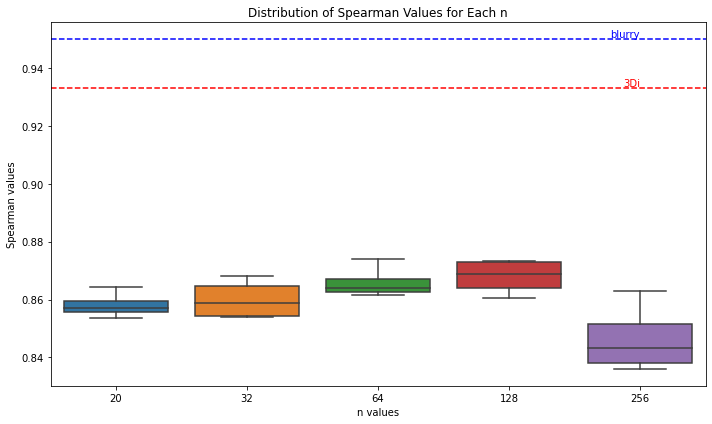

In [22]:
plot_spearman_distribution(spearman_dict)

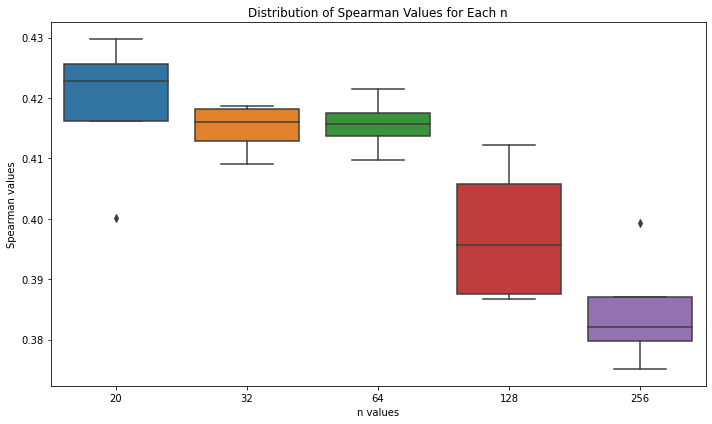

In [20]:
plot_spearman_distribution(mlddt_dict)